<a href="https://colab.research.google.com/github/Elvillano3005/Algoritmos-optimizacion/blob/main/Hooke_Jeeves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Función Rosenbrock

## $f(\vec{x}) = \sum_{i=1}^{n-1}[ 100(x_{i+i} - x_i^2)^2+(1-x_i)^2]$

In [2]:
def rosenbrock(x: np.ndarray) -> float:
    return np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2)
rosenbrock(np.array([1, 1]))

np.int64(0)

# Funcion booth

In [3]:
def booth(x: np.array)-> float:
  return (x[0]+2*x[1]-7)**2+(2*x[0]+ x[1]-5)**2
booth(np.array([1,3]))

np.int64(0)

## Funciones para hacer las gráficas en 3D y Contorno

In [4]:
def meshdata(x_min, x_max, y_min, y_max, function, n_puntos=200):
    # Crear una malla de puntos para x e y
    x_vals = np.linspace(x_min, x_max, n_puntos)
    y_vals = np.linspace(y_min, y_max, n_puntos)
    X, Y = np.meshgrid(x_vals, y_vals)

    # Evaluar la función en la malla
    Z = np.array([function(np.array([x, y])) for x, y in zip(np.ravel(X), np.ravel(Y))])
    Z = Z.reshape(X.shape)
    return X, Y, Z

def plot3d(X, Y, Z):
    # Crear la figura y los ejes 3D directamente
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    # Gráfico 3D
    surface = ax.plot_surface(X, Y, Z, edgecolor='none', cmap='viridis')
    ax.set_title('Función en 3D')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')

    plt.tight_layout()

    # Devolver fig y ax para poder modificar después
    return fig, ax

def plotContour(X, Y, Z):
    # Crear la figura y los ejes directamente
    fig, ax = plt.subplots()

    # Gráfico de contorno
    contour = ax.contourf(X, Y, Z, levels=10, cmap='viridis')
    fig.colorbar(contour, ax=ax)
    ax.set_title('Contornos de la función')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.tight_layout()

    # Devolver fig y ax para poder añadir puntos después
    return fig, ax

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Contornos de la función'}, xlabel='x', ylabel='y'>)

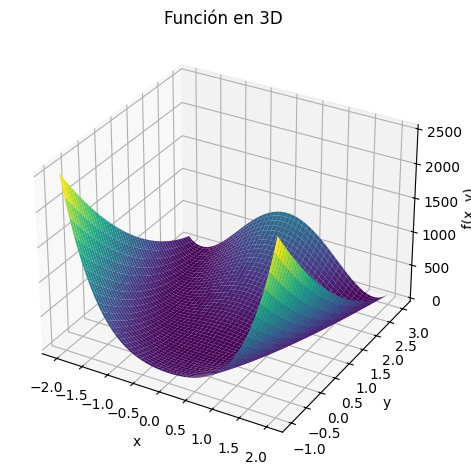

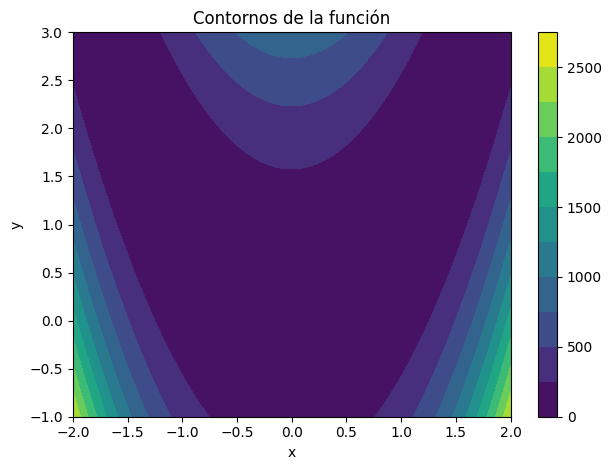

In [5]:
X, Y, Z = meshdata(-2, 2, -1, 3, rosenbrock)
plot3d(X, Y, Z)
plotContour(X, Y, Z)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Contornos de la función'}, xlabel='x', ylabel='y'>)

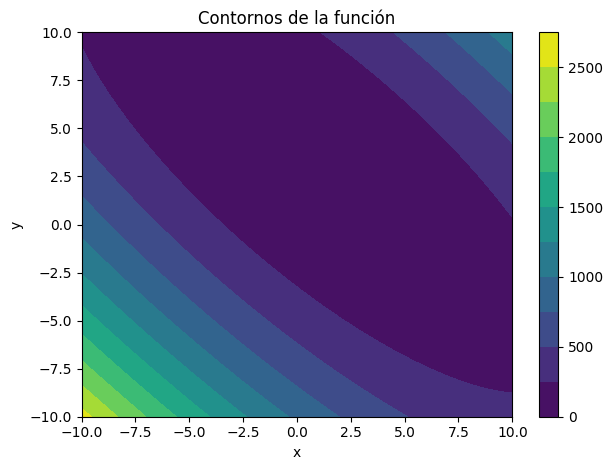

In [6]:
X, Y, Z = meshdata(-10, 10, -10, 10, booth, n_puntos=200)
#plot3d(X, Y, Z)
plotContour(X, Y, Z)

movimiento exploratorio

In [7]:
def movimiento_exploratorio(x, delta, funcion, N):
  xc = np.array(x)
  for i in range(N):
    x_plus = np.array(x)
    x_minus = np.array(x)
    x_plus[i] = x[i] + delta[i]
    x_minus[i] = x[i] - delta[i]
    xs = [x_minus, x, x_plus] #Ordenarlo
    fx = [funcion(x) for x in xs]
    indice_min = np.argmin(fx) #Indice que corresponda al de menor valor
    x = xs[indice_min] #x se vuelve el minimo

  if all(x == xc):
    return xc, False
  return x, True

In [8]:
movimiento_exploratorio(np.array([1.0, 3.0]), np.array([0.5, 0.5]), booth, 2)

(array([1., 3.]), False)

Movimiento de patron

In [9]:
def movimiento_patron(x_arreglo, k):
  return x_arreglo[k] + (x_arreglo[k] - x_arreglo[k-1])

Graficar puntos

In [10]:
def movimiento_exploratorio_grafica(x, delta, funcion, N):
  xc = np.array(x)
  for i in range(N):
    x_plus = np.array(x)
    x_minus = np.array(x)
    x_plus[i] = x[i] + delta[i]
    x_minus[i] = x[i] - delta[i]
    xs = [x_minus, x, x_plus] #Ordenarlo
    fx = [funcion(x) for data in xs]
    indice_min = np.argmin(fx) #Indice que corresponda al de menor valor
    x = xs[indice_min] #x se vuelve el minimo

  return xs

[array([0.5, 3. ]), array([1., 3.]), array([1.5, 3. ]), array([0.5, 2.5]), array([0.5, 3. ]), array([0.5, 3.5])]


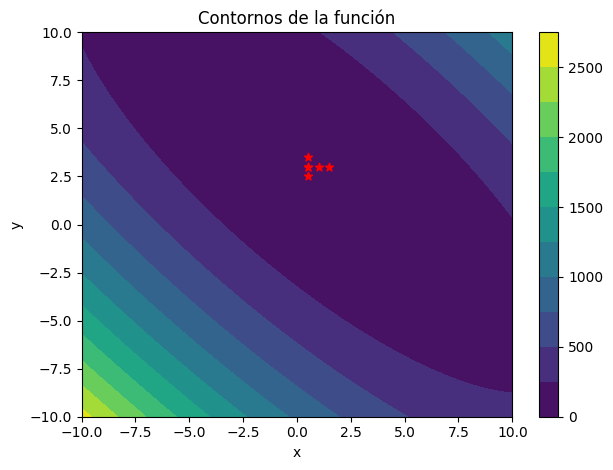

In [11]:
N = 2
alpha = 1.5
epsilon = 0.001
k = 0
delta = np.array([0.5, 0.5])

xs = movimiento_exploratorio_grafica(np.array([1.0, 3.0]), np.array([0.5, 0.5]), booth, 1)
xs.extend(movimiento_exploratorio_grafica(np.array([1.0, 3.0]), np.array([0.5, 0.5]), booth, 2))
print(xs)

X, Y, Z = meshdata(-10, 10, -10, 10, booth)
fig, ax = plotContour(X, Y, Z)

for j in range(len(xs)):
  ax.scatter(xs[j][0], xs[j][1], color='red', marker='*')

Algoritmo completo

In [12]:
delta = np.array([0.5, 0.5])
N = 2
epsilon = 0.001
alpha = 2
k = 0
x_arreglo = [np.array([0.0, 0.0])]

In [13]:
terminar = False
x, exito = movimiento_exploratorio(x_arreglo[k], delta, booth, N)

if exito:
  x_arreglo.append(x)
  k += 1

  while terminar == False:
    xp = movimiento_patron(x_arreglo, k)
    x, exito = movimiento_exploratorio(xp, delta, booth, N)

    print("xp: ", xp, booth(xp))
    print("x: ", x, booth(x))

    if booth(x) >= booth(xp):
      if np.linalg.norm(delta) < epsilon:
          terminar = True
      else:
          delta = delta / alpha
    else:
      x_arreglo.append(x)
      k += 1
#print(x_arreglo)

xp:  [1. 1.] 20.0
x:  [1.5 1.5] 6.5
xp:  [2.5 2.5] 6.5
x:  [2. 2.] 2.0
xp:  [2.5 2.5] 6.5
x:  [2. 2.] 2.0
xp:  [2. 2.] 2.0
x:  [2. 2.] 2.0
xp:  [2. 2.] 2.0
x:  [1.75 2.25] 1.125
xp:  [1.5 2.5] 0.5
x:  [1.5 2.5] 0.5
xp:  [1.5 2.5] 0.5
x:  [1.375 2.625] 0.28125
xp:  [1. 3.] 0.0
x:  [1. 3.] 0.0
xp:  [1. 3.] 0.0
x:  [1. 3.] 0.0
xp:  [1. 3.] 0.0
x:  [1. 3.] 0.0
xp:  [1. 3.] 0.0
x:  [1. 3.] 0.0
xp:  [1. 3.] 0.0
x:  [1. 3.] 0.0
xp:  [1. 3.] 0.0
x:  [1. 3.] 0.0
xp:  [1. 3.] 0.0
x:  [1. 3.] 0.0
xp:  [1. 3.] 0.0
x:  [1. 3.] 0.0
xp:  [1. 3.] 0.0
x:  [1. 3.] 0.0


In [15]:
delta = np.array([0.5, 0.5])
N = 2
epsilon = 0.001
alpha = 2
k = 0
x_arreglo = [np.array([0.0, 0.0])]

In [16]:
def HookeJeeves(delta, N, epsilon, alpha, k, x_arreglo, funcion):
  while np.linalg.norm(delta) > epsilon:
    x, exito = movimiento_exploratorio(x_arreglo[k], delta, funcion, N)
    print("x: ", x, "exito ", exito)
    if exito:
      x_arreglo.append(x)
      k += 1
      xp = movimiento_patron(x_arreglo, k)
      if funcion(xp) < funcion(x):
        x_arreglo.append(xp)
        k += 1
    else:
      delta = delta / alpha

Grafica final

x:  [0.5 0.5] exito  True
x:  [1.5 1.5] exito  True
x:  [2. 2.] exito  False
x:  [1.75 2.25] exito  True
x:  [1.5 2.5] exito  False
x:  [1.375 2.625] exito  True
x:  [1.25 2.75] exito  False
x:  [1.1875 2.8125] exito  True
x:  [1.125 2.875] exito  False
x:  [1.09375 2.90625] exito  True
x:  [1.0625 2.9375] exito  False
x:  [1.046875 2.953125] exito  True
x:  [1.03125 2.96875] exito  False
x:  [1.0234375 2.9765625] exito  True
x:  [1.015625 2.984375] exito  False
x:  [1.01171875 2.98828125] exito  True
x:  [1.0078125 2.9921875] exito  False
x:  [1.00585938 2.99414062] exito  True
x:  [1.00390625 2.99609375] exito  False
x:  [1.00292969 2.99707031] exito  True
x:  [1.00195312 2.99804688] exito  False


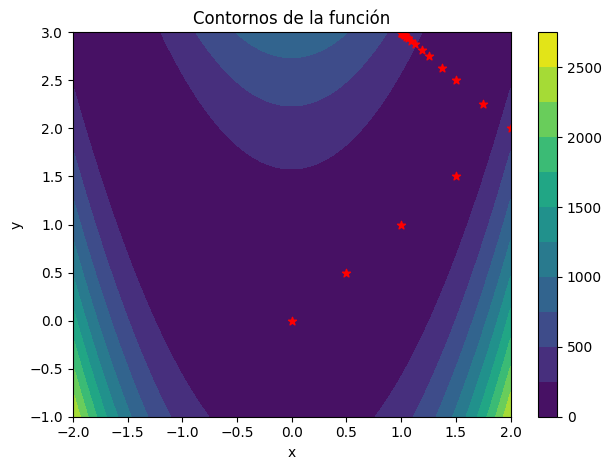

In [17]:
HookeJeeves(delta, N, epsilon, alpha, k, x_arreglo, booth)

X, Y, Z = meshdata(-2, 2, -1, 3, rosenbrock)
fig, ax = plotContour(X, Y, Z)

for j in range(len(x_arreglo)):
  ax.scatter(x_arreglo[j][0], x_arreglo[j][1], color='red', marker='*')